In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading Combined Data

In [2]:
df = pd.read_csv('combined.csv')

In [3]:
df.dtypes

latitude               float64
longitude              float64
blk_no                  object
road_name               object
postal_code              int64
address                 object
cbd_dist               float64
min_dist_mrt           float64
month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
lease_remain_years       int64
dtype: object

In [4]:
df.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
cbd_dist               0
min_dist_mrt           0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
lease_remain_years     0
dtype: int64

# Minor Data Preprocessing for Combined Data

In [6]:
import statistics

def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))

In [7]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]


In [8]:
scope_df = scope_df.drop_duplicates()


# Checking and Handling for Skewness in the Data

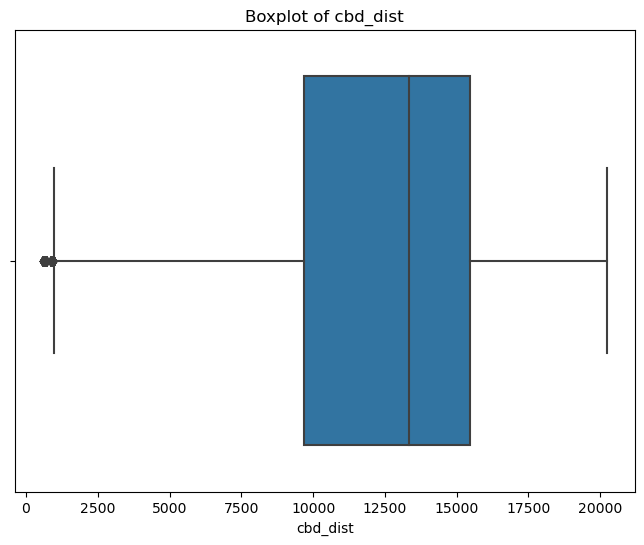

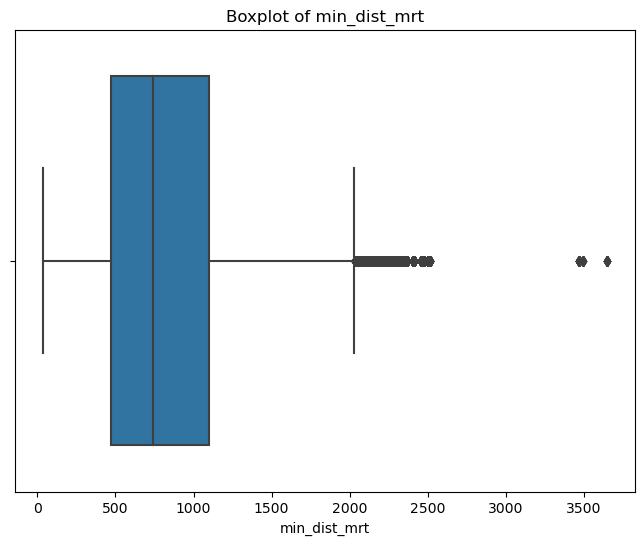

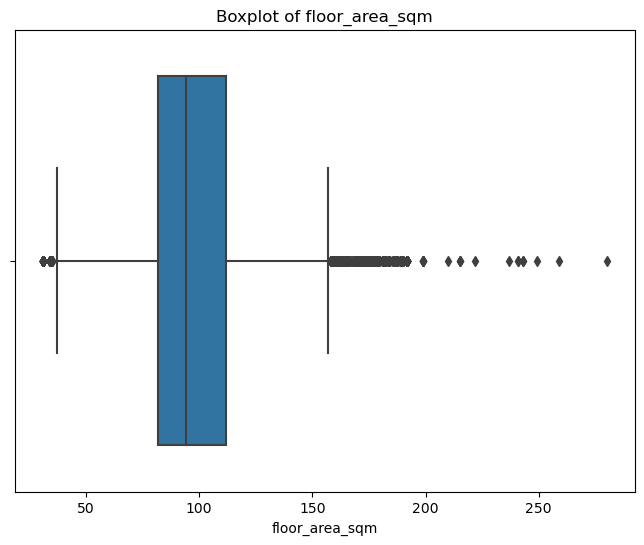

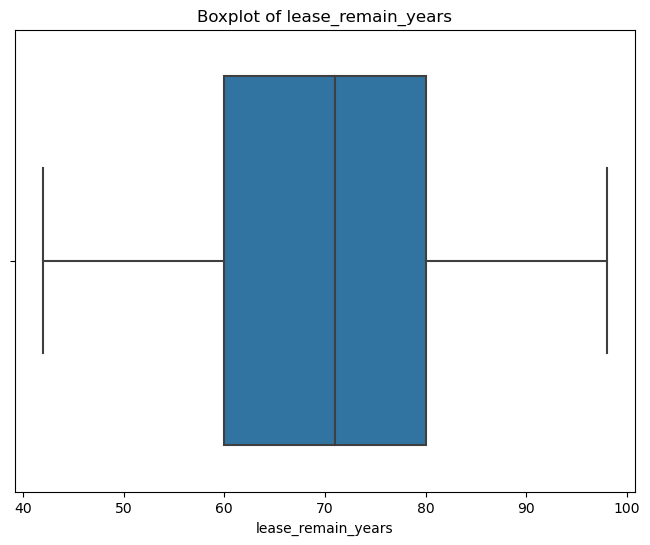

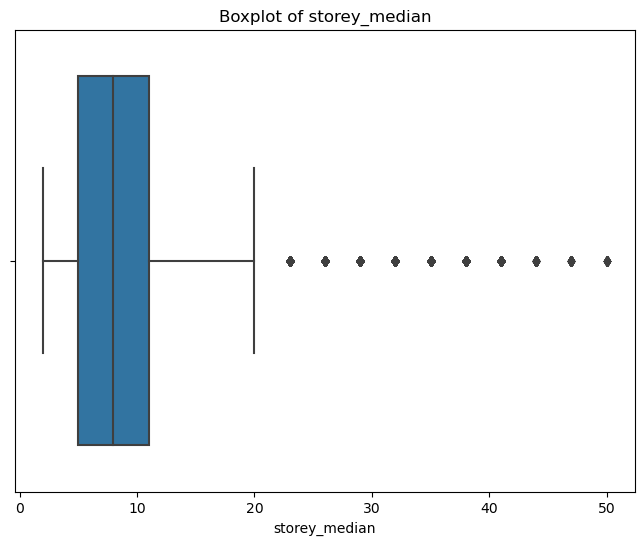

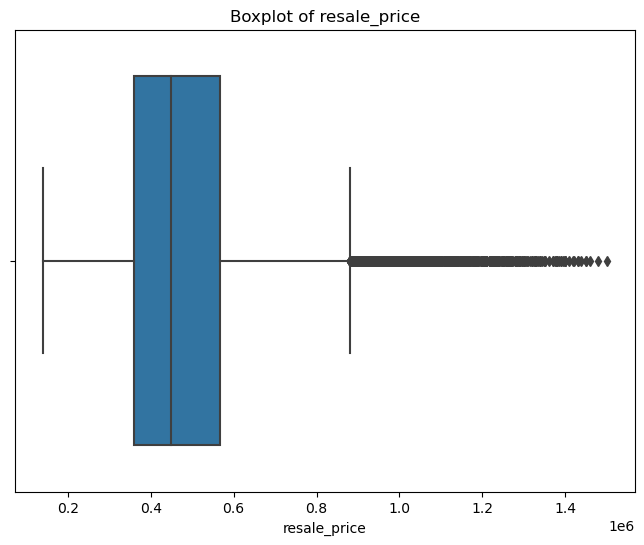

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [10]:
df1 = scope_df

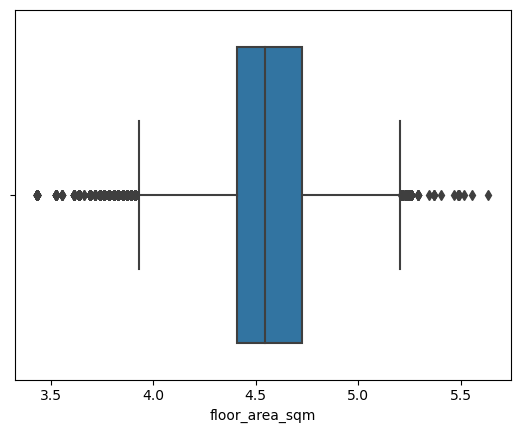

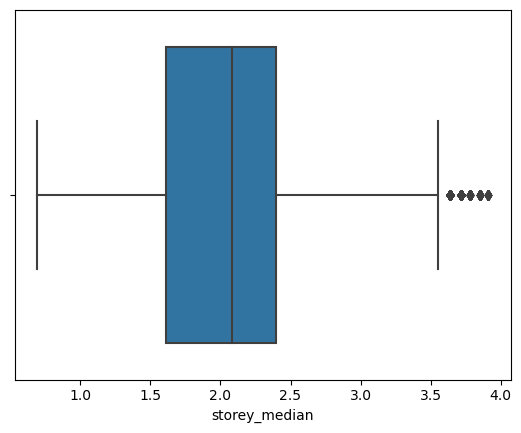

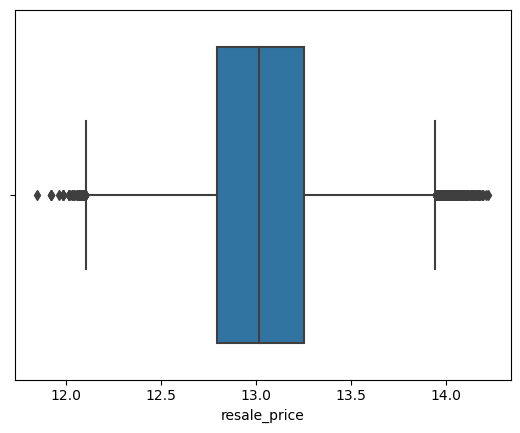

In [11]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

In [12]:
df1.dtypes

cbd_dist              float64
min_dist_mrt          float64
floor_area_sqm        float64
lease_remain_years      int64
storey_median         float64
resale_price          float64
dtype: object

# Visualization among different columns using Correlation Matrix

<Axes: title={'center': 'Correlation Heatmap'}>

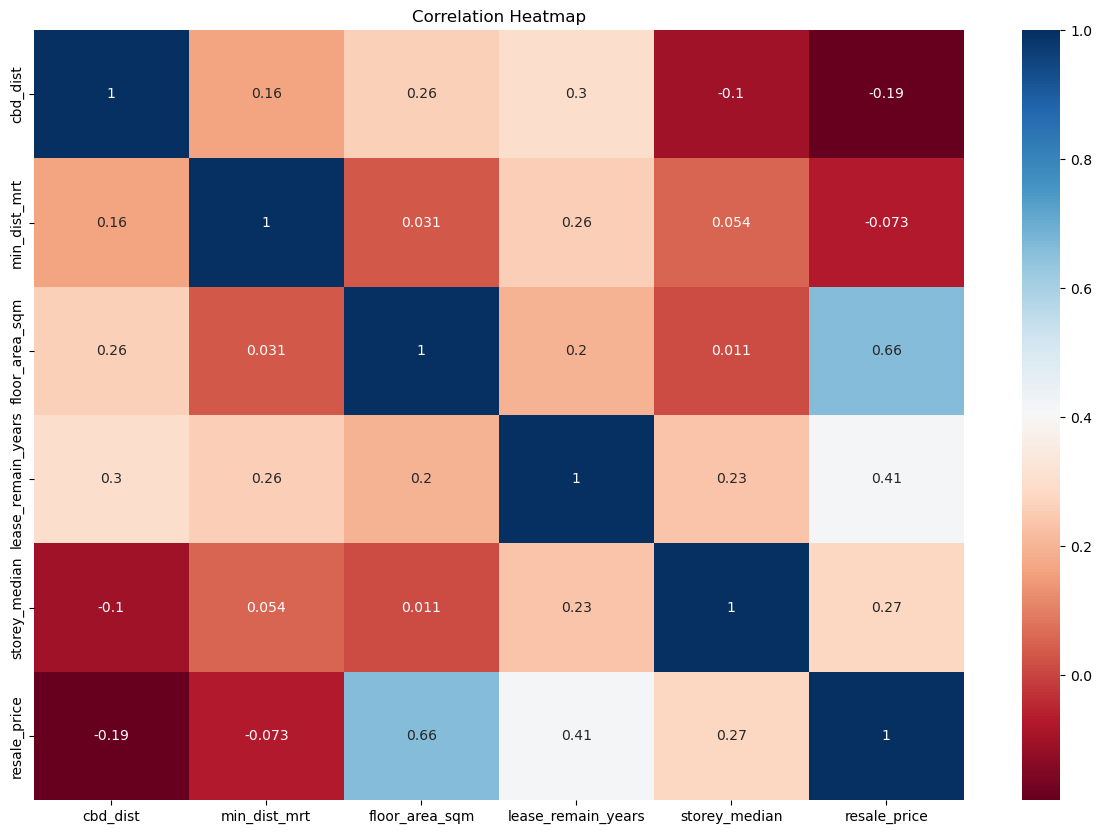

In [13]:
import seaborn as sns

corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

# Encoding Data

In [14]:
from sklearn.preprocessing import StandardScaler

X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
test_dataframe = pd.DataFrame(X)
test_dataframe

0         1         2         3         4
0      -0.838667  0.376364 -2.988233 -1.184544 -0.441764
1      -0.838667  0.376364 -2.988233 -1.184544 -0.441764
2      -0.838667  0.376364 -2.988233 -1.184544  0.212397
3      -0.838667  0.376364 -2.988233 -1.184544  0.655627
4      -0.838667  0.376364 -2.988233 -1.184544  0.655627
...          ...       ...       ...       ...       ...
196260  0.007476  0.587288  0.372167 -0.590635 -0.441764
196261  1.492301  0.269017  2.291865  0.003273 -0.441764
196262  0.665607  0.004814 -0.236292 -0.590635 -0.441764
196263  0.242901  1.112470  0.995767 -0.516397 -0.441764
196264 -2.164531 -1.183555 -1.842262 -1.184544 -0.441764

[196265 rows x 5 columns]

# Splitting the Data for Training and Testing Purposes

In [16]:
from sklearn.model_selection import train_test_split

# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree Regressor

In [16]:
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import GridSearchCV

# # Decision Tree Regressor
# dtr = DecisionTreeRegressor()

# # hyperparameters
# param_grid = {
#     'max_depth': [2, 5, 10, 15, 20, 22],
#     'min_samples_split': [2, 3, 4, 5],
#     'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # gridsearchcv
# grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)
# print("Best hyperparameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# # evalution metrics
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print(" ")
# print('Mean squared error:', mse)
# print('Mean Absolute Error', mae)
# print('Root Mean squared error:', rmse)
# print(" ")
# print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 3}
 
Mean squared error: 0.014330831581291215
Mean Absolute Error 0.0940665658506324
Root Mean squared error: 0.11971145133733538
 
R-squared: 0.867955683892367


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# RandomForestClassifier
rfc = RandomForestRegressor()

# Hyperparameters
param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_distributions, cv=5)
random_search.fit(X_train, y_train)
print("Best hyperparameters:", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)


Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 22}
 
Mean squared error: 0.012463324025144435
Mean Absolute Error 0.08834298197474541
Root Mean squared error: 0.11163925844049859
 
R-squared: 0.8851629029346426


In [21]:
new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

230398.4461432631

In [18]:
# Saving the model
import pickle
with open('model_1.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler_1.pkl', 'wb') as f:
    pickle.dump(scaler, f)